##### duration: 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
import sys
import logging
logging.basicConfig(level=logging.INFO)
print(sys.executable)

/n/groups/datta/tim_sainburg/conda_envs/peromoseq/bin/python3


### Get recording info (google sheets)

In [3]:
import requests
import pandas as pd
from io import BytesIO

In [4]:
# spreadsheet_url = 'https://docs.google.com/spreadsheet/ccc?key=14HIqUaSl_n-91hpAvmACY_iVY9nLKdlA6qklhxfZon0&output=csv&gid=0'
spreadsheet_url = "https://docs.google.com/spreadsheet/ccc?key=1jACsUmxuJ9Une59qmvzZGc1qXezKhKzD1zho2sEfcrU&output=csv&gid=0"
response = requests.get(spreadsheet_url)
recording_df = pd.read_csv(BytesIO(response.content))

In [5]:
recording_df[:3]

,Subject,duration_m,video_recording_id,ephys_id,calibration_id,calibration_board_shape,calibration_square_size,video_location_on_o2,ephys_location_on_o2,calibration_location_on_o2,samplerate
0,M04002,10,24-05-01-13-26-43-110846,2024-05-01_13-26-37,24-05-01-13-45-07-825493,NaN,NaN,/n/groups/datta/tim_sainburg/datasets/chronic2...,/n/groups/datta/tim_sainburg/datasets/chronic2...,/n/groups/datta/tim_sainburg/datasets/chronic2...,150


### Run

In [23]:
for idx, recording_row in recording_df.iterrows():
    break

In [24]:
output_directory = Path("/n/groups/datta/tim_sainburg/datasets/scratch/") / "240806-3d-pipeline"

In [25]:
output_directory

PosixPath('/n/groups/datta/tim_sainburg/datasets/scratch/240806-3d-pipeline')

In [26]:
output_directory_continuous_features = output_directory / 'continuous_features' / recording_row.video_recording_id
output_directory_continuous_features.mkdir(parents=True, exist_ok=True)

In [27]:
from multicamera_airflow_pipeline.tim_240731.keypoints.continuous_variables import ContinuousVariables 

In [28]:
!ls {output_directory}

2D_predictions	    camera_sync		  gimbal	      spikesorting
arena_alignment     continuous_features   openephys_sync      triangulation
camera_calibration  egocentric_alignment  size_normalization


In [29]:
egocentric_alignment_file = list(
    (output_directory / "egocentric_alignment" / recording_row.video_recording_id / 'rigid').glob(
        "egocentric_alignment_rigid.*.mmap"
    )
)[0]

In [30]:
arena_alignment_file = list(
    (output_directory / "arena_alignment" / recording_row.video_recording_id).glob(
        "coordinates_aligned.*.mmap"
    )
)[0]

In [39]:
continuous_features_estimator = ContinuousVariables(
    continuous_features_output_directory= output_directory_continuous_features,
    coordinates_egocentric_filename = egocentric_alignment_file,
    coordinates_arena_filename = arena_alignment_file,
    framerate = recording_row.samplerate,
    recompute_completed=True
)

INFO:multicamera_airflow_pipeline.tim_240731.keypoints.continuous_variables:Python interpreter binary location: /n/groups/datta/tim_sainburg/conda_envs/peromoseq/bin/python3


INFO:multicamera_airflow_pipeline.tim_240731.keypoints.continuous_variables:Loading coordinates egocentric and arena aligned
INFO:multicamera_airflow_pipeline.tim_240731.keypoints.continuous_variables:Computing continuous features


computing curvature:   0%|          | 0/90009 [00:00<?, ?it/s]

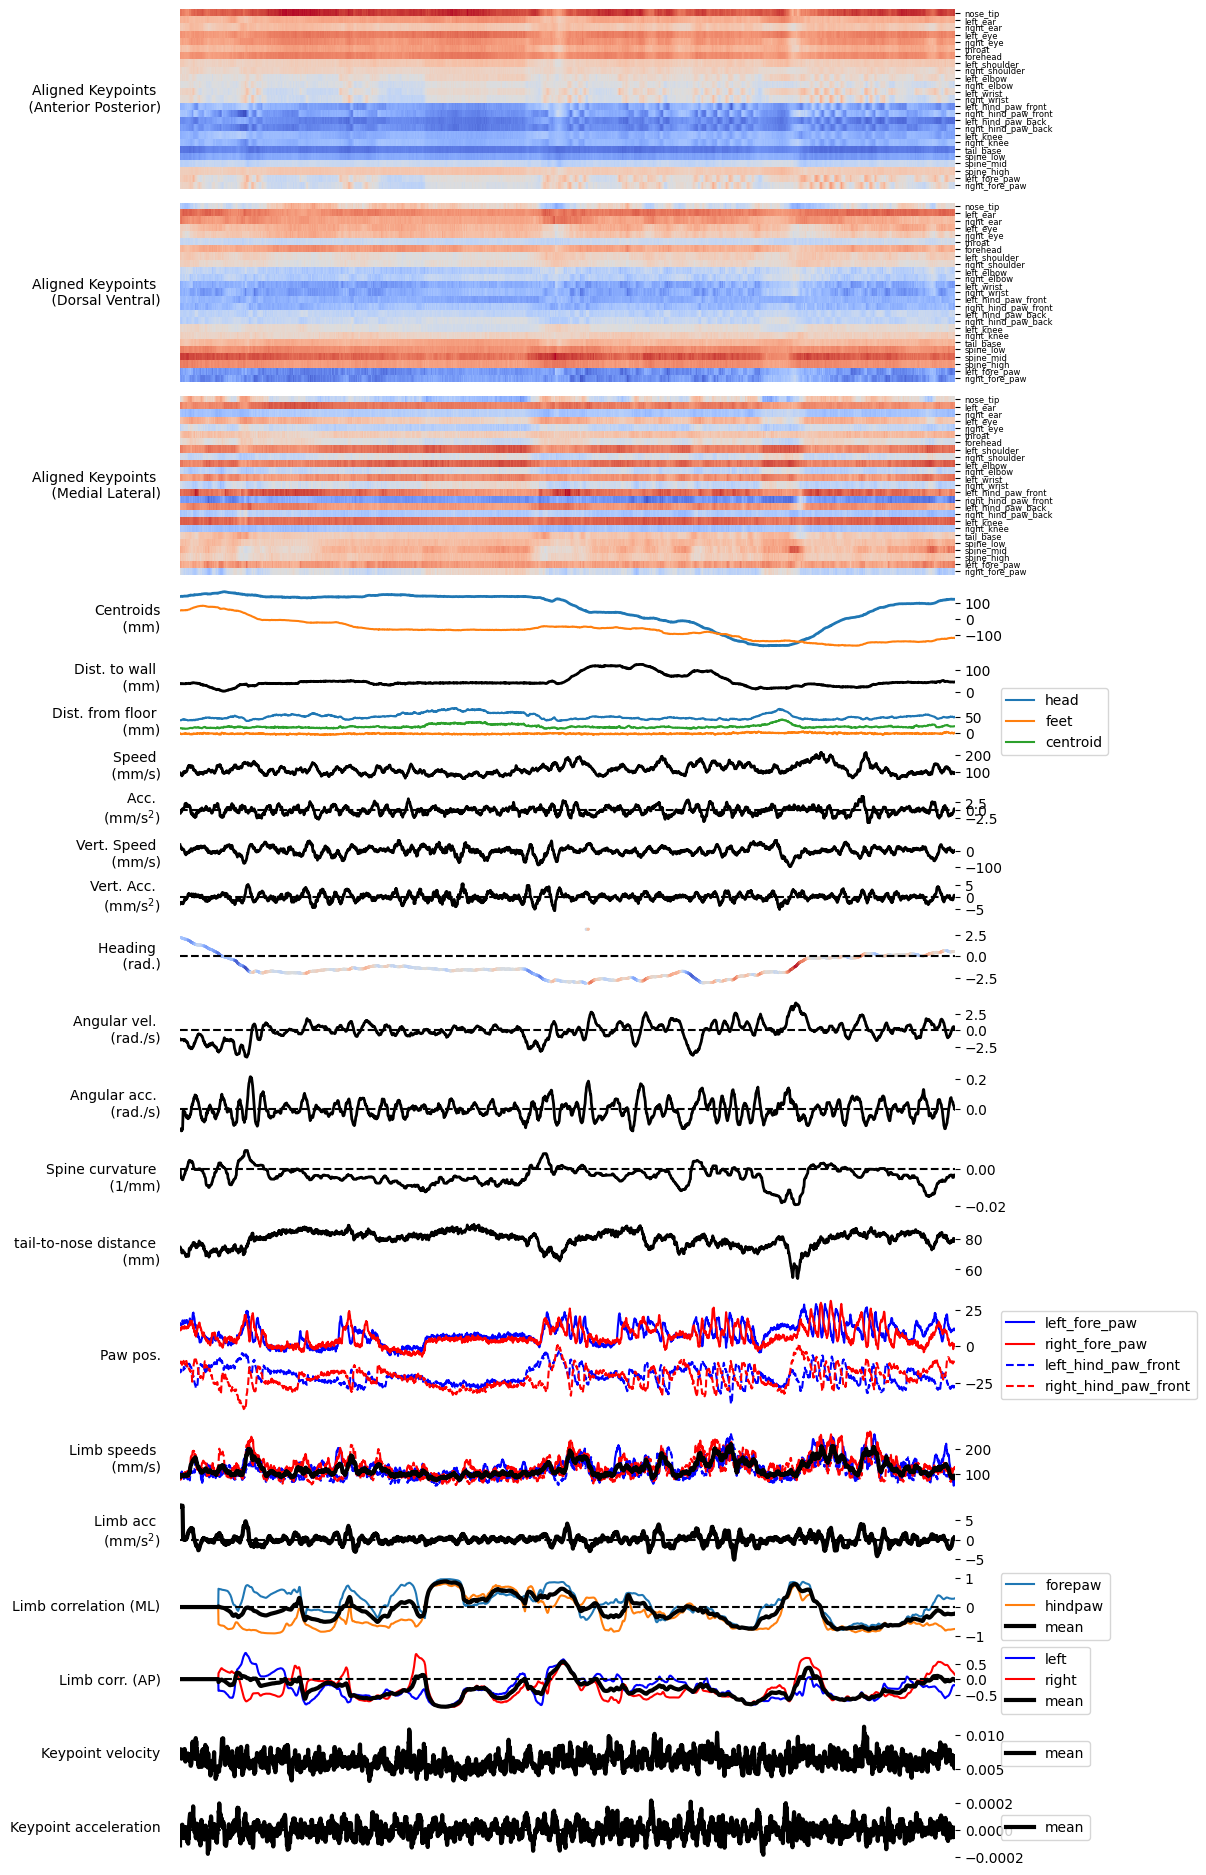

In [40]:
continuous_features_estimator.run()

In [ ]:
!ls {output_directory_continuous_features}

In [36]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

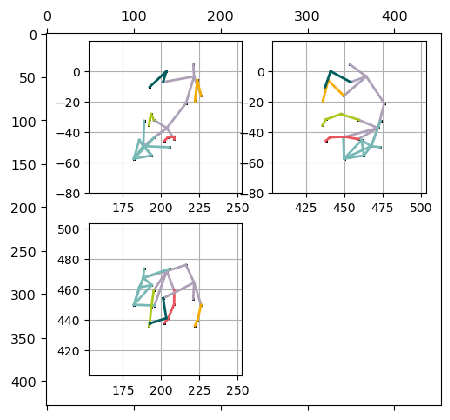

In [37]:
img = mpimg.imread(output_directory_egocentric_alignment / 'rigid' / 'poses_before_alignment.png')
plt.matshow(img)

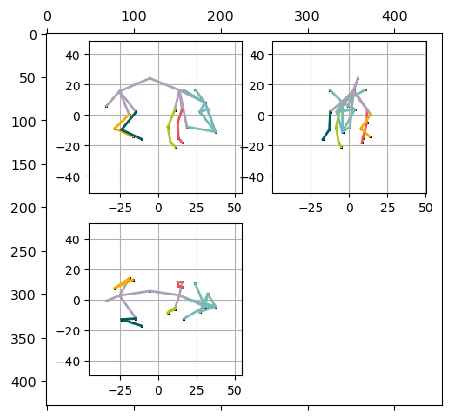

In [38]:
img = mpimg.imread(output_directory_egocentric_alignment / 'rigid' / 'poses_after_alignment.png')
plt.matshow(img)

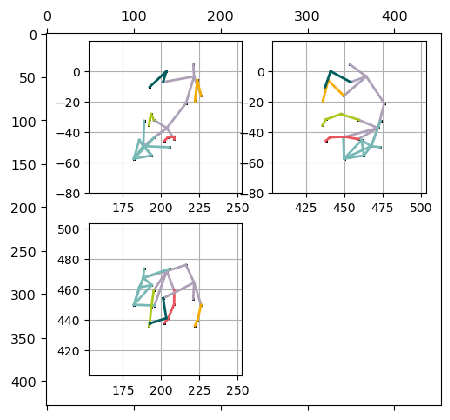

In [43]:
img = mpimg.imread(output_directory_egocentric_alignment / 'nonrigid' / 'poses_before_alignment.png')
plt.matshow(img)

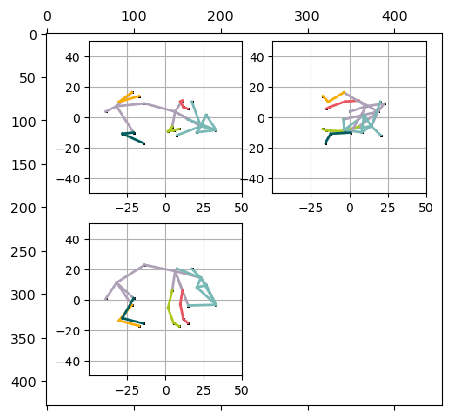

In [44]:
img = mpimg.imread(output_directory_egocentric_alignment / 'nonrigid' / 'poses_after_alignment.png')
plt.matshow(img)